<H1><center><font color='limegreen'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='limegreen'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

## **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

----
----

### **`Initial Setup`**

In [2]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

### **`Business Problem Understanding`**

#### **Context**

#### **Problem Statement**

#### **Project Stakeholders:**

#### **Goals**

#### **Analytic Approach**

#### **Metric Evaluation**

Karena kita akan memfokuskan Nasabah ***Deposito Berjangka***, maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`yes` : Nasabah ***Deposito Berjangka*** (Positive)
<br>
`no` : Nasabah Tidak ***Deposito Berjangka*** (Negative)

**Metric Evaluation**:

|                       | ***Tidak Deposito Berjangka*-`Pred`** | ***Deposito Berjangka*-`Pred`** |
| --------------------- | ---------------------- | ------------------ |
| ***Tidak Deposito Berjangka*-`Act`** |           TN           |          FP        |
| ***Deposito Berjangka*-`Act`**     |           FN           |          TP        |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Nasabah yang kenyataannya not *Deposito Berjangka* (**Loyal**), tapi terprediksi sebagai Nasabah *Deposito Berjangka* (**Tidak loyal**) 
<br>
`Konsekuensi`: 
* Perusahaan akan mengeluarkan biaya akuisisi Nasabah ([CAC](https://www.paddle.com/resources/customer-acquisition-cost)) untuk Nasabah yang tidak tepat
* Mengeluarkan biaya akuisisi Nasabah ([Customer Acquisition Cost (CAC)](https://scalecrush.io/blog/average-customer-acquisition-cost-ecommerce#:~:text=The%20average%20CAC%20on%20the%20eCommerce%20scene%20is%20around%20%2445%20to%20%2450.&text=Remember%2C%20there%20is%20no%20hard,acquisition%20is%20a%20great%20decision.)) untuk Nasabah yang tidak *Deposito Berjangka* => **`$50`** (*worst case*)

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Nasabah yang kenyataannya *Deposito Berjangka* (**Tidak Loyal**), tapi terprediksi sebagai Nasabah not *Deposito Berjangka* (**loyal**)
<br>
`Konsekuensi`: 
* Perusahaan akan kehilangan potensi Nasabah yang bisa saja menjadi Nasabah yang loyal.
* Mengeluarkan biaya retensi Nasabah Customer Retention Cost ([CRC](https://finmark.com/glossary/customer-retention-cost/)) untuk Nasabah yang *Deposito Berjangka* => **`$10`** (*5 kali lebih rendah dari (CAC) ([Amy Gallo, 2014](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers))*)

Berdasarkan konsekuensi diatas, menurut langkah yang tepat untuk pemilihan model adalah model yang **sebanyak mungkin memprediksi `kelas positif yang benar` (*True Postive*)**, dan **sesedikit mungkin memprediksi `kelas positif yang salah` (*False Negative*)**. Jadi metrik utama yang akan digunakan adalah **PR-AUC** (*Precision-Recall Curve*). Matrik **PR-AUC** dipilih Dikarenakan kita lebih membutuhkan perhitungan `true positif` dibandingkan `true negatif` dan memiliki kelas yang `imbalance`, maka **PR-AUC** adalah metrik pengukuran yang tepat yakni kombinasi antara recall dan presisi berdasarkan treshold.

Alasan kami memilih AUC daripada Accuracy adalah karena,
seperti yang kita lihat dalam EDA, dataset yang kita gunakan adalah dataset yang imbalanced dengan kelas "no" sebagai kelas mayoritas. Jika kita menggunakan Accuracy sebagai metrik kita, model apa pun dapat memberikan Accuracy yang sangat baik. Tetapi pada akhirnya, itu akan menjadi model acak. AUC mengatasi masalah ini dengan melihat True Positive Rate (TPR) dan False Positif Rate (FPR). Hanya jika TPR dan FPR berada jauh di atas garis acak dalam kurva ROC, kita akan mendapatkan AUC yang baik. Accuracy tidak menjamin hal itu.


Dataset dan deskripsi dapat di akses pada link berikut:
<br>
[Bank Marketing Campaign](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `age` | Umur nasabah (`tahun`) |
| `job` | jenis pekerjaan nasabah |
| `marital` | status pernikahan nasabah |
| `education` | level pendidikan nasabah |
| `default` | Apakah memiliki riwayat kredit macet |
| `housing` | Apakah memiliki pinjaman dana untuk rumah |
| `loan` | Apakah memiliki pinjaman dana untuk pribadi |
| `contact` | Tipe device untuk berkomunikasi |
| `month` | Bulan terakhir kali dihubungi |
| `day_of_week` | Minggu terakhir kali dihubungi |
| `duration` | Lama waktu ketika dihubungi (`detik`) |
| `campaign` | Jumlah kontak yang dilakukan selama campaign |
| `pdays` | Jumlah hari setelah terakhir kali dihubungi |
| `previous` | Jumlah kontak yang dilakukan sebelum campaign |
| `poutcome` | Hasil campaign sebelumnya |
| `emp.var.rate` | Tingkat variasi lapangan kerja |
| `cons.price.idx` | Indeks harga konsumen |
| `cons.conf.idx` | Indeks kepercayaan konsumen |
| `euribor3m` | Tarif euribor 3 bulan |
| `nr.employed` | Jumlah karyawan |
| `y` | Status berlangganan deposito |

**`y`** == `Yes` : Nasabah berlangganan deposito berjangka, `No` : Nasabah tidak berlangganan deposito berjangka
<br>

In [3]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Final Project\data\\raw\\bank-additional-full.csv", sep=";")
print(f'Jumlah baris dan kolom: {df.shape}')

df.sample(10)

Jumlah baris dan kolom: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33682,25,blue-collar,single,basic.6y,unknown,no,no,cellular,may,wed,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
6773,55,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24659,39,housemaid,married,basic.9y,no,yes,yes,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
6771,28,admin.,single,unknown,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16873,46,blue-collar,married,unknown,no,no,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
31172,39,services,single,high.school,no,yes,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
26640,30,technician,single,professional.course,no,no,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
21003,31,housemaid,married,university.degree,no,yes,yes,cellular,aug,thu,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
16477,36,blue-collar,married,high.school,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
3146,30,blue-collar,single,basic.4y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


#### **Initial Assessment**

In [53]:
# Check karakteristik dataset

pd.DataFrame(
        {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'total_row': df.isna().count().values,
        'total_null': df.isna().sum().values,
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
        }
    )

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,age,int64,41188,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
1,job,object,41188,0,0.0,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,object,41188,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,41188,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,object,41188,0,0.0,3,"[no, unknown, yes]"
5,housing,object,41188,0,0.0,3,"[no, yes, unknown]"
6,loan,object,41188,0,0.0,3,"[no, yes, unknown]"
7,contact,object,41188,0,0.0,2,"[telephone, cellular]"
8,month,object,41188,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,object,41188,0,0.0,5,"[mon, tue, wed, thu, fri]"


__Insight :__
<br>

* Numerical Variable:
<br>
    - `Discrete` : age, campaign, pdays, previous
<br>
    - `Continue` : duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical variable:
<br>
    - `Nominal` : job, marital, default, housing, loan, contact, month, day_of_week, poutcome, y
<br>
    - `Ordinal` : education
* `Target`: y (Berlangganan Deposito Berjangka atau tidak)
* Terdapat total 41.188 jumlah baris pada dataset
* Tipe data untuk setiap variabel sudah sesuai
* Tidak terdapat missing value pada setiap kolom (*analisis lebih lanjut*)
* Pada kolom "*duration*" memiliki unique value yang sangat banyak sebesar 1.544 unique value. Maka kita akan kelompokan berdasarkan kelasnya
* Beberapa kolom yang akan dikelompokan berdasarkan kelasnya antara lain: 

Lalu kita akan coba melihat statistik deskriptif sederhana dari dataset ini

In [5]:
# Deskriptif statistik

display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


__Insight :__
* Pesebaran nilai pada kolom ***duration*** cukup besar, ditunjukan dari nilai standar deviasi yaitu 259.28
* Pesebaran nilai pada kolom ***pdays*** cukup besar, ditunjukan dari nilai standar deviasi yaitu 186.91
* Pesebaran nilai pada kolom ***nr.employed*** cukup besar, ditunjukan dari nilai standar deviasi yaitu 72.25
* 

#### **Numerical variable**

##### **Numerikal Diskrit** (*age, campaign, pdays, previous*)

C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2692977559.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2692977559.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2692977559.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2692977559.py:13: UserWarning: The figure layou

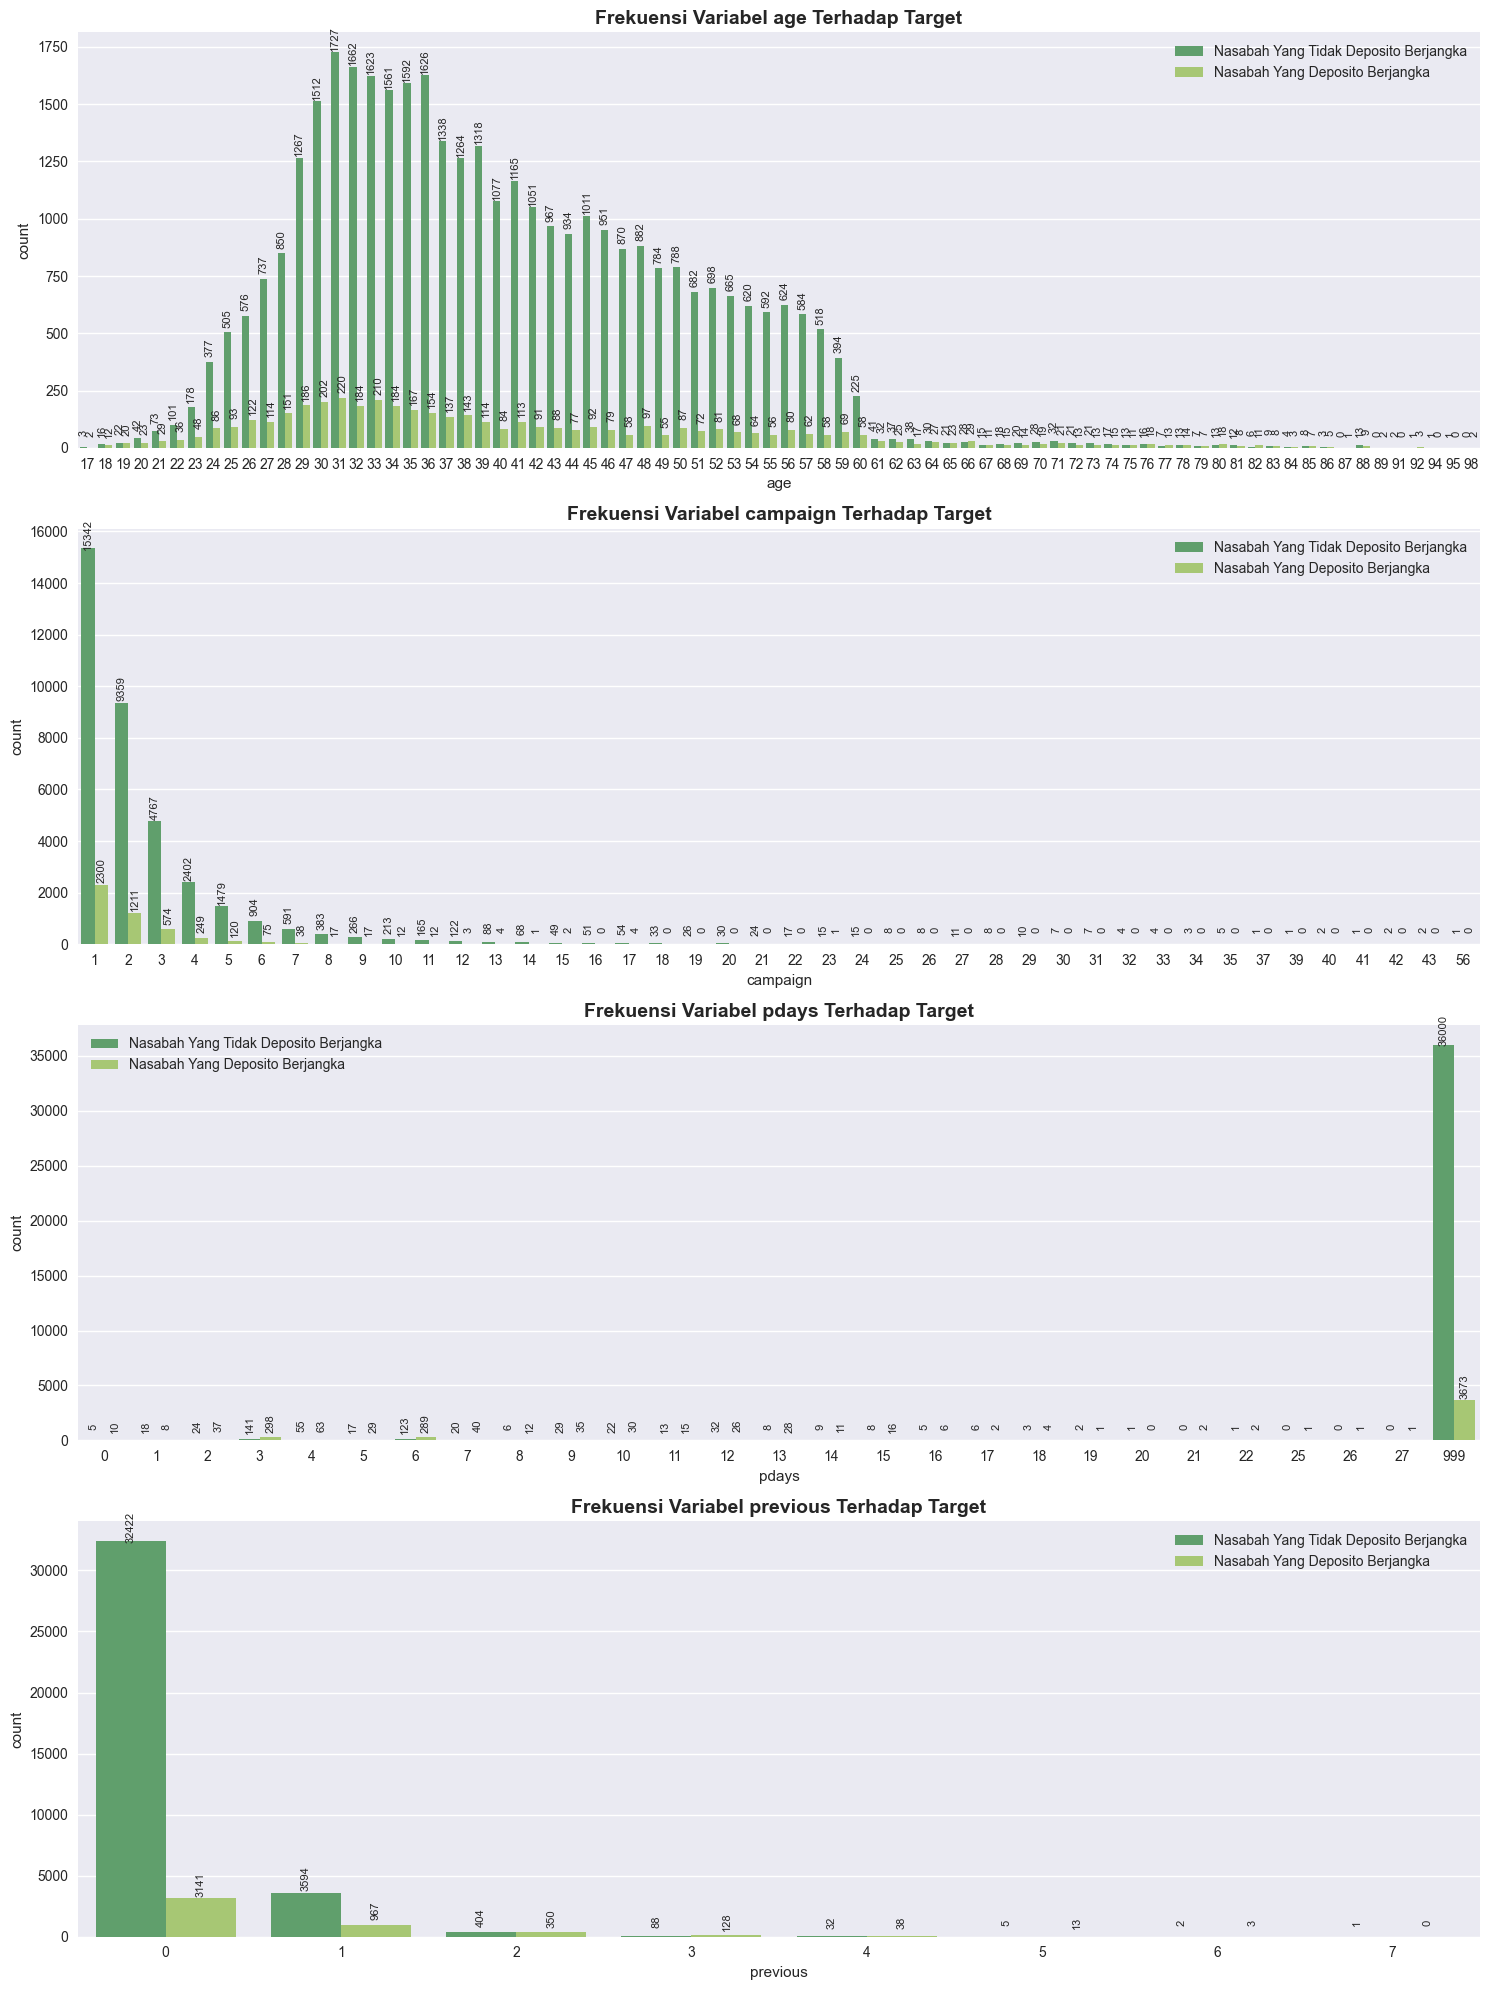

In [51]:
# Cek variabel numerikal diskrit

diskrit = ["age", "campaign", "pdays", "previous"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in diskrit:
    plt.subplot(4,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    # for p in ax.patches:
    #     percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
    #     x = p.get_x() + p.get_width() / 2
    #     y = p.get_height()
    #     ax.annotate(percentage, (x, y), ha='center', va='center', rotation=90, size=8,)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', rotation=90,
                    size=8,
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.show()

__Insight :__
* Pada kolom ***NumberOfDeviceRegistered***, pelanggan dengan jumlah device terdaftar lebih dari 2 device cenderung akan *churn* (*diatas 4% dari total pelanggan*). Hal ini mungkin karena pelanggan memiliki banyak opsi e-commerce dan pelanggan tersebut dapat berpindah-pindah e-commerce
* Pada kolom ***NumberOfAddress***, pelanggan yang memiliki jumlah address 2 dan 3 akan cenderung churn (*diatas 4% dari total pelanggan*). Untuk jumlah address lebih dari 11, kemungkinan merupakan nilai outlier, maka perlu dianalisis kembali

##### **Numerikal Kontinyu** (*duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed*)

C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\3682092038.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\3682092038.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\3682092038.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\3682092038.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\3682092038.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


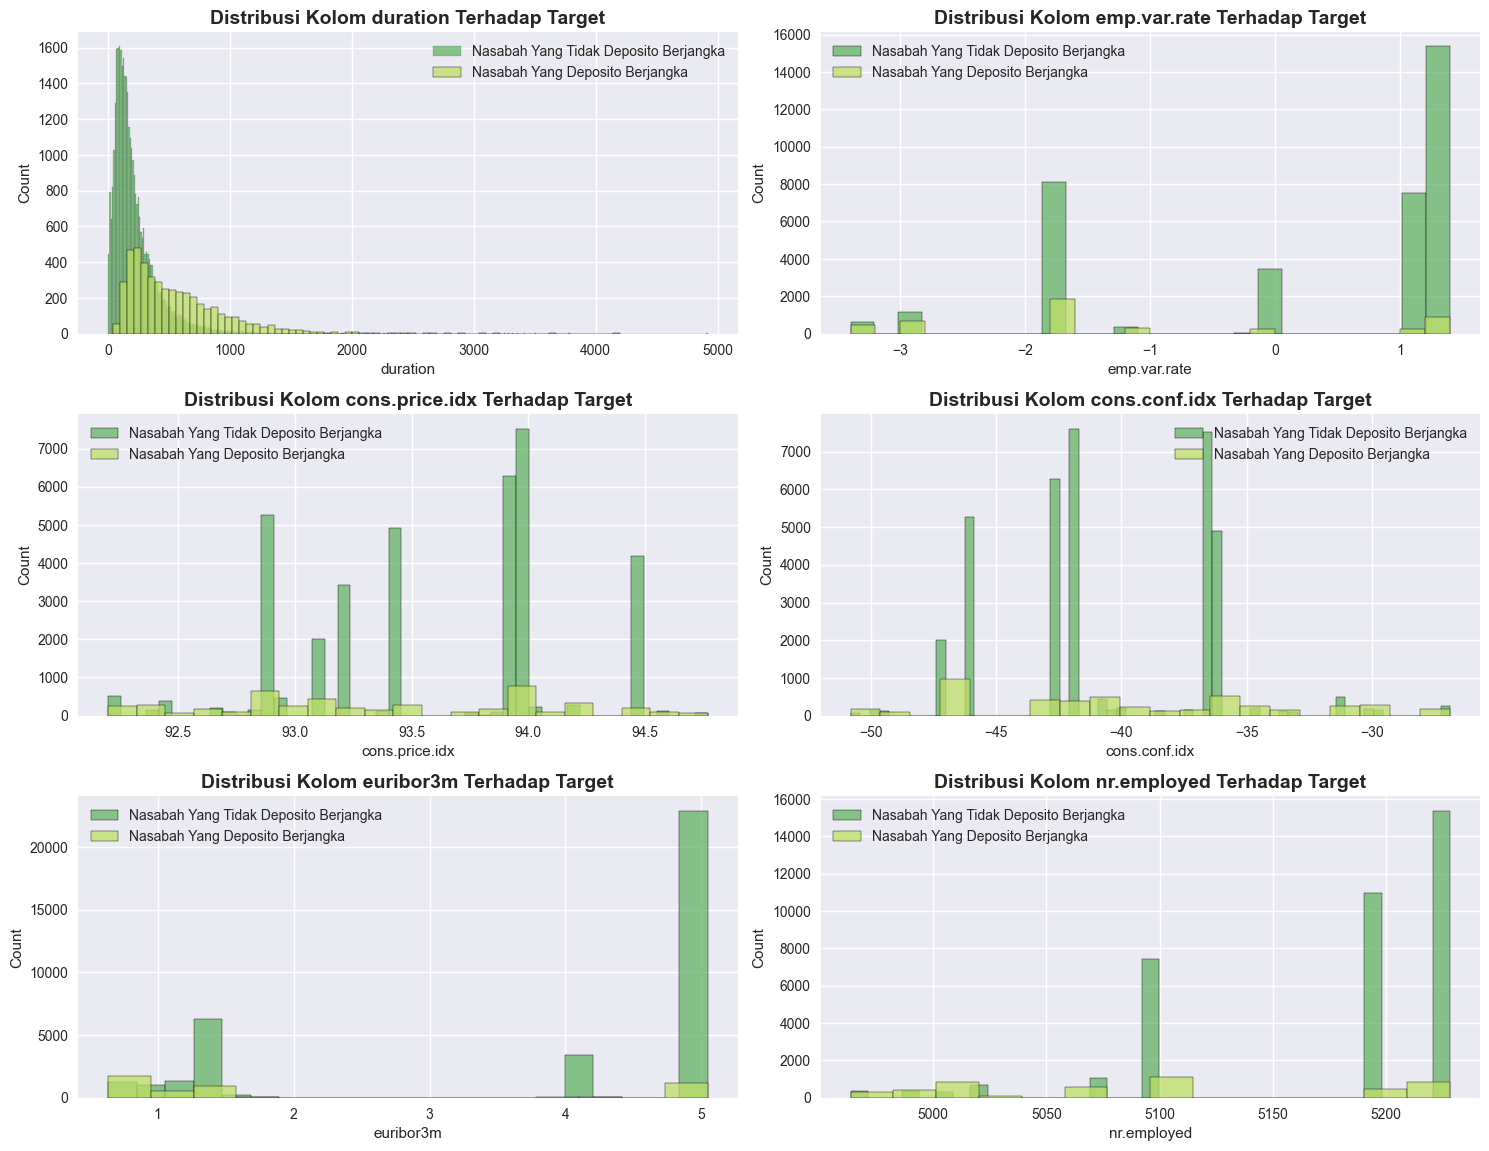

In [20]:
# Cek variabel numerikal kontinyu

kontinu = ["duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("summer")

a=1
for i in kontinu:
    plt.subplot(4,2,a)
    sns.histplot(x=df[df["y"]=="no"][i],color=cmap([100]))
    sns.histplot(x=df[df["y"]=="yes"][i],color=cmap([190]))
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.title(f"Distribusi Kolom {i} Terhadap Target", fontsize=14, weight='bold')
    a+=1

plt.show()

__Insight :__
* Pada kolom ***Tenure***, pelanggan churn terjadi pada awal bulan pemakaian yaitu di bulan ke-0 hingga bulan ke-2. Hal tersebut kemungkinan bisa terjadi dikarenakan pelanggan masih beradaptasi dengan platform e-commerce dan merasa tidak cocok dengan platform tersebut
* Pada kolom ***WarehouseToHome***, pelanggan dengan jarak gudang ke rumah kurang dari 20 mil cenderung churn. Hal tersebut mungkin dikarenakan ongkos kirim yang terlalu mahal untuk jarak yang dekat dengan rumah
* Pada kolom ***DaySinceLastOrder***, pelanggan terbanyak churn terjadi satu sampai dua hari setelah melakukan order. Hal tersebut mungkin terjadi dikarenakan pelanggan hanya membutuhkan barang dari e-commerce dan tidak tertarik dengan platform e-commerce tersebut
* Pada kolom ***CashbackAmount*** (nilai dibawah 100 dolar kemungkinan adalah nilai outlier), semakin rendah cashback yang diberikan maka semakin banyak pelanggan yang churn
* Pada **semua kolom numerikal kontinyu** pesebaran data tidak merata, hal ini terjadi karena terdapat rare label. Maka perlu dilakukan analisa kembali

#### **Categorical variable**

##### **Kategorikal Nominal `Target`** (*y*)

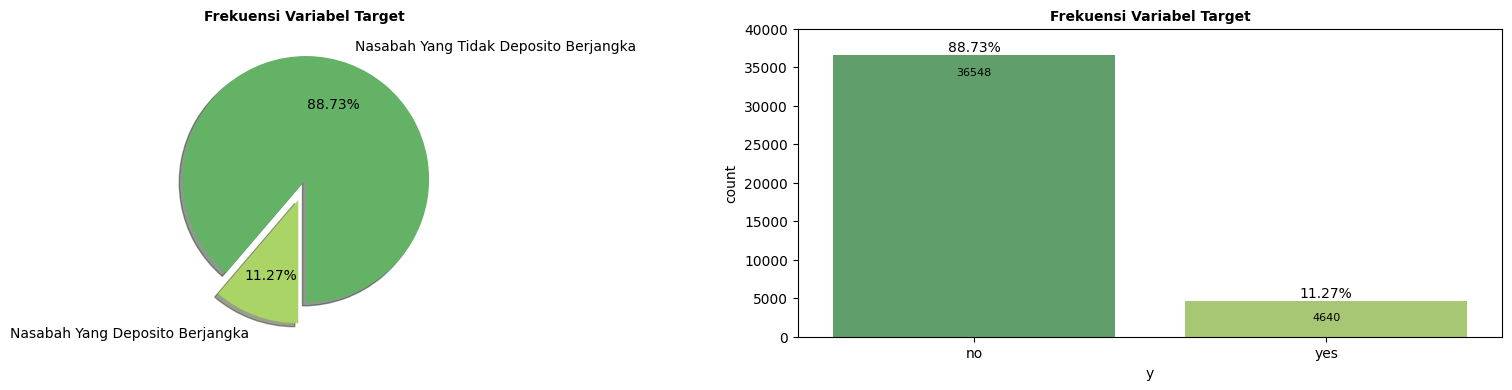

In [18]:
# Melihat kategori Target

# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20,4))
plt.style.use('default')
cmap = plt.get_cmap('summer')

# create pie chart
temp_df = df.y.value_counts(normalize=True) * 100
axes[0].pie(x=[temp_df.loc["no"], temp_df.loc["yes"]], labels=['Nasabah Yang Tidak Deposito Berjangka', 'Nasabah Yang Deposito Berjangka'], colors=cmap([100, 170]), autopct='%0.2f%%', 
        startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.15), shadow=True)
# set title
axes[0].set_title('Frekuensi Variabel Target', fontsize=10, weight='bold')

# create barplot
plt.title("Frekuensi Variabel Target", fontsize=10, weight='bold')
# set title dan 
ax = sns.countplot(data=df, x="y", palette="summer")
ax.set_ylim([0, 40000])
# annotation
for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show();

__Insight :__
* Jumlah pengguna yang ***Churn*** (`Tidak Loyal`) sebanyak 674 (17.10%)
* Jumlah pengguna yang **Tidak *Churn*** (`Loyal`) sebanyak 3267 (82.90%)
* Dari dataset terjadi ***Imbalance***, maka kita akan lakukan analisis mendalam

##### **Kategorikal Nominal** (*job, marital, default, housing, loan, contact, month, day_of_week, poutcome*)

C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2175869991.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2175869991.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2175869991.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\2175869991.py:14: UserWarning: The figure layou

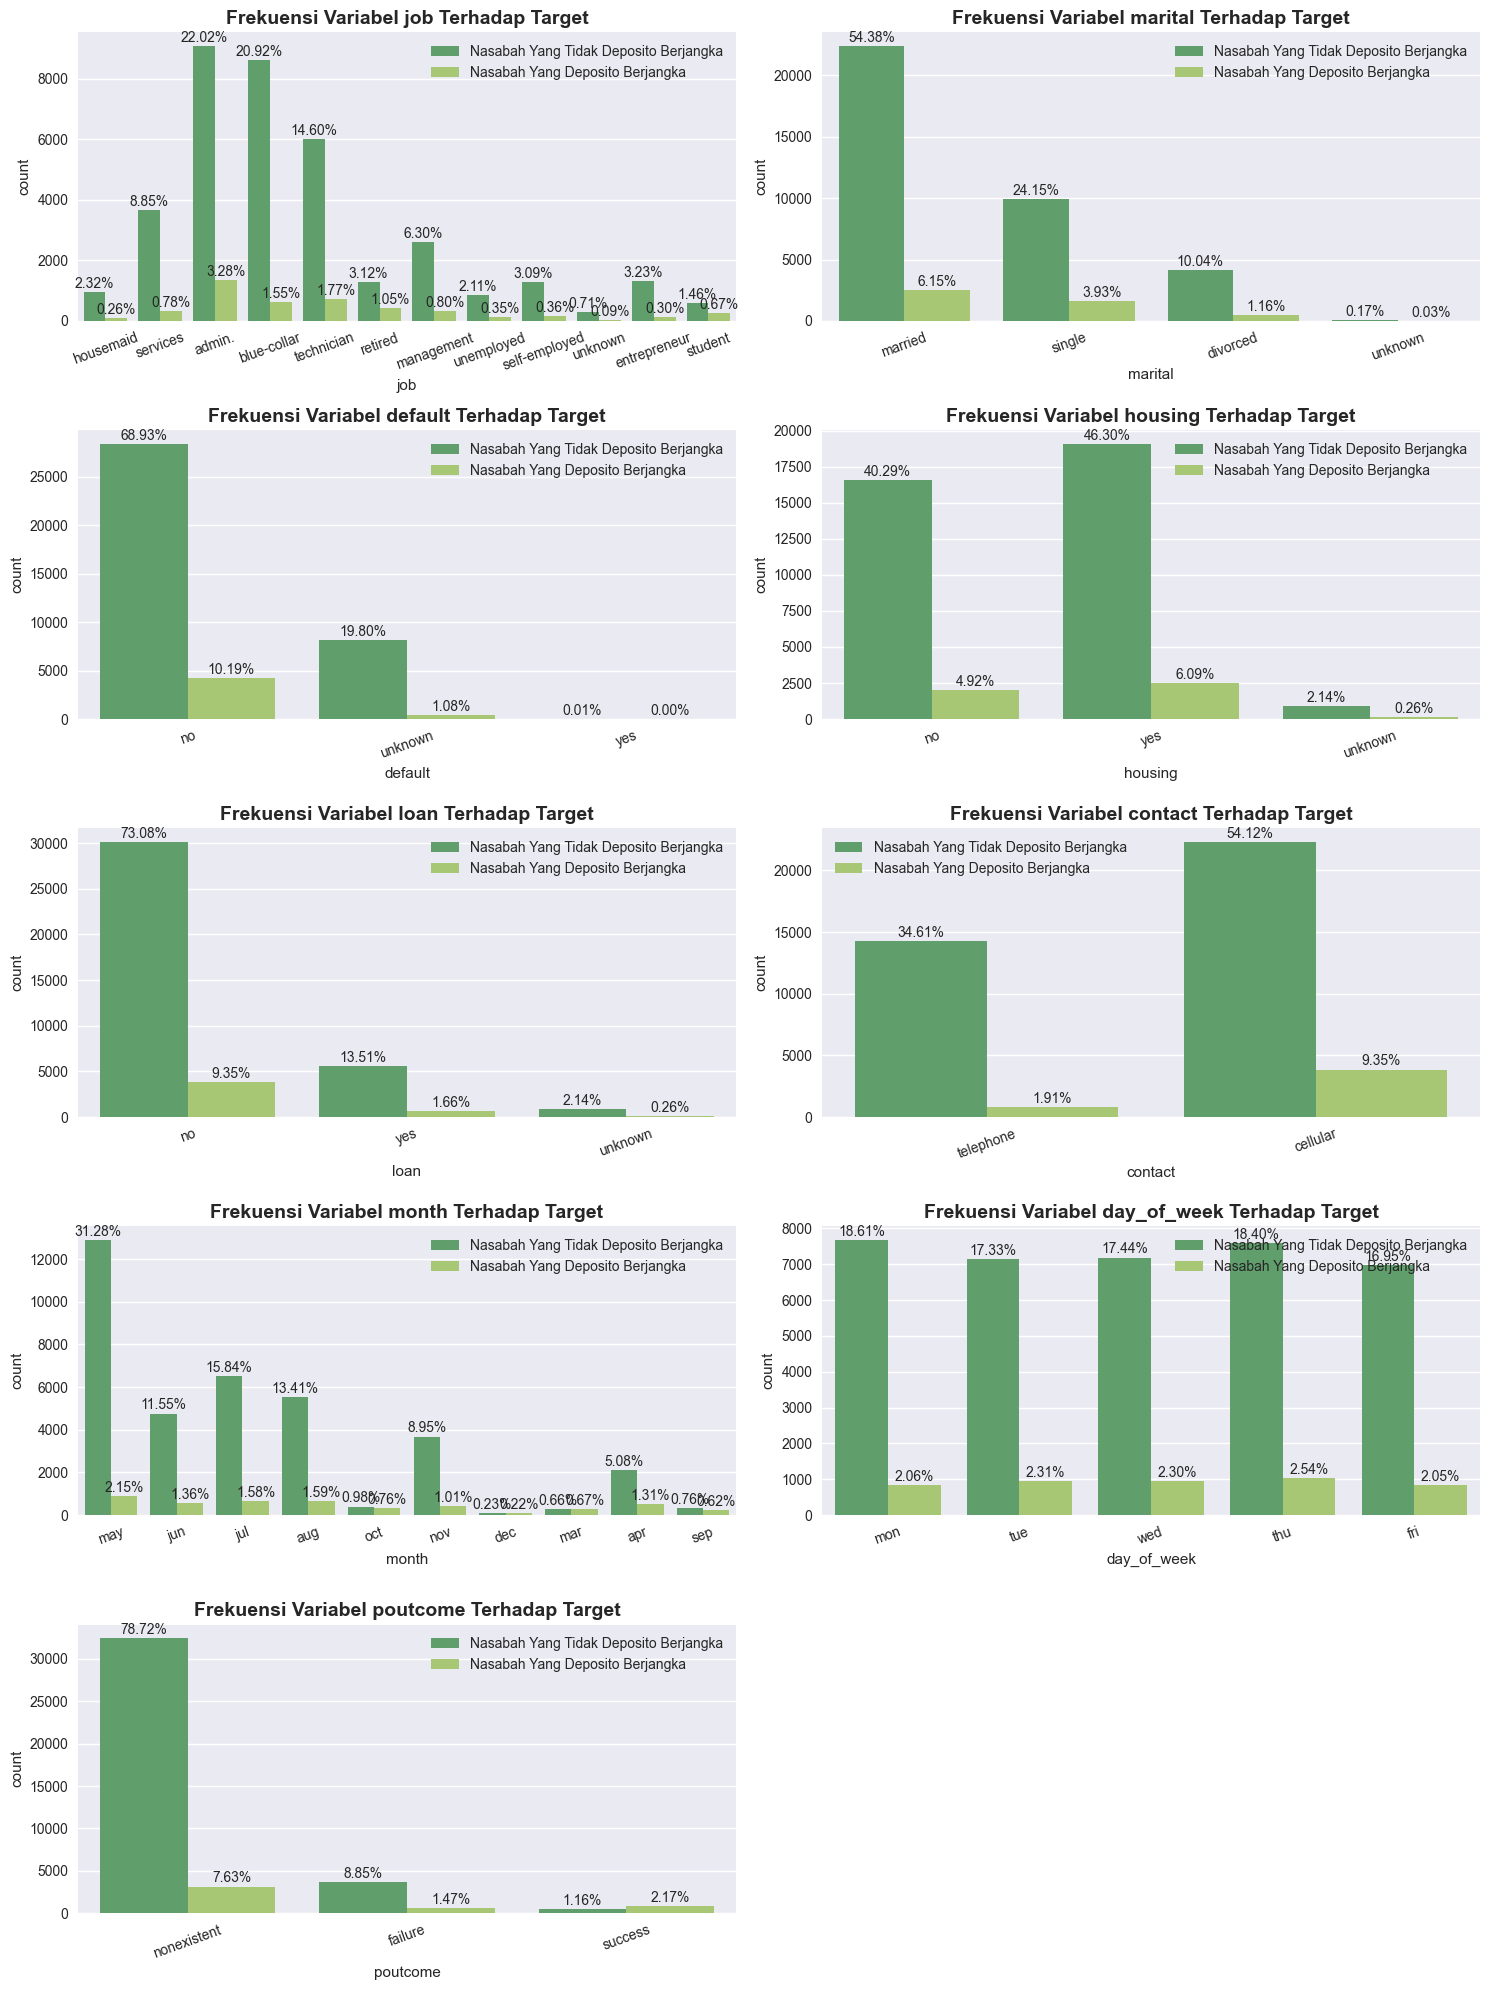

In [47]:
# Cek variabel kategorikal nominal

nominal = ["job", "marital", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in nominal:
    plt.subplot(5,2,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    ax.tick_params(axis='x', labelrotation=20)
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -5), 
    #                 textcoords = 'offset points')

plt.show()

__Insight :__
* Pada fitur ***job***, **admin** merupakan profesi dengan tingkat tertinggi dalam Berlangganan Deposito Berjangka maupun Tidak Berlangganan deposito berjangka. Hal ini disebabkan karena  jumlah nasabah yang bekerja sebagai admin lebih banyak dibandingkan dengan profesi lainnya.
* Pada fitur ***marital***, mayoritas nasabah ialah nasabah yang sudah menikah, diikuti oleh nasabah lajang, bercerai, dan unknown.
* Pada fitur ***default*** menunjukan apakah nasabah memiliki kredit macet atau tidak. Mayoritas nasabah tidak memiliki kredit macet, diikuti oleh kategori unknown, dan nasabah yang memiliki kredit macet.
* Pada fitur ***housing*** menunjukan apakah nasabah memiliki pinjaman rumah atau tidak. Mayoritas nasabah memiliki pinjaman rumah, diikuti oleh kategori tidak memiliki pinjaman rumah, dan kategori unknown.
* Pada fitur ***loan*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***contact*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***month*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***day_of_week*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***poutcome*** menunjukan hasil dari campaign sebelumnya. kategori terbanyak dari hasil kampanye pemasaran sebelumnya ialah nonexistent (tidak ada). Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Yang perlu diperhatikan disini adalah, kategori dengan hasil yang success dari kampanye sebelumnya, sebagian besar dari nasabah tersebut memang berlangganan deposito berjangka. Hal ini terlihat dari 2,17% Berlangganan Deposito Berjangka dan 1,16% Tidak Berlangganan Deposito Berjangka. Dari sini, kita dapat membuat asumsi, bahwa fitur ini mungkin memiliki beberapa nilai dalam memprediksi variabel target. khususnya kategori poutcome_success.
* 

##### **Kategorikal Ordinal** (*education*)

C:\Users\fathurizkym\AppData\Local\Temp\ipykernel_3296\1392414332.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


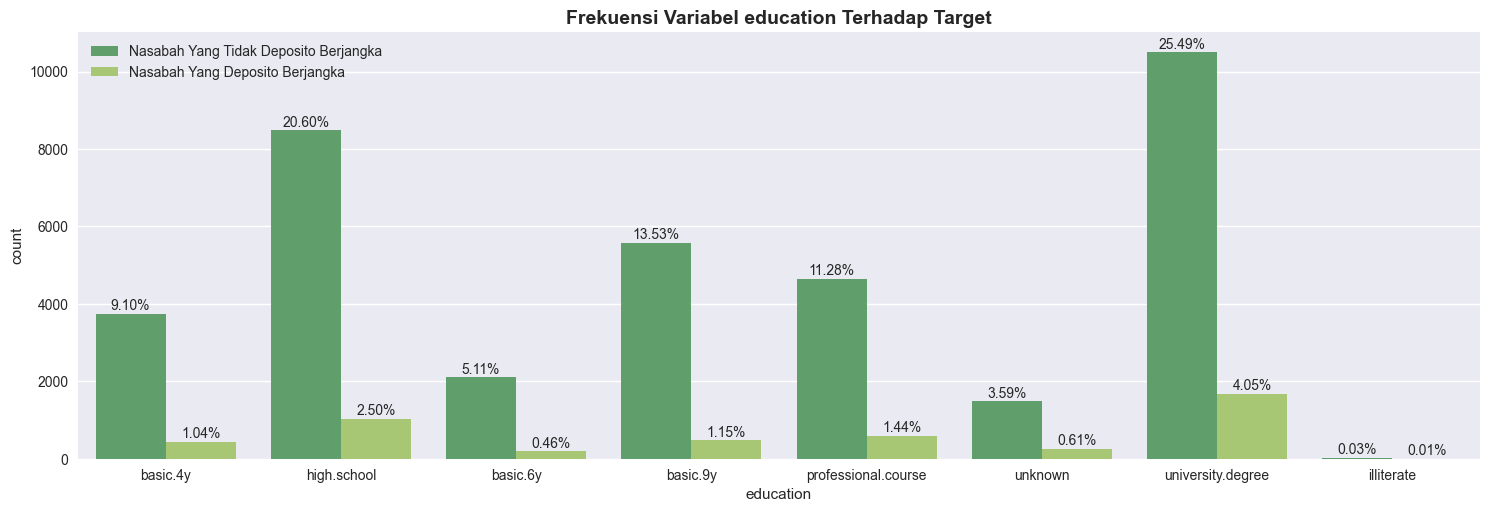

In [32]:
# Cek variabel kategorikal ordinal

ordinal = ["education"]

plt.figure(figsize=(15,5))
cmap = plt.get_cmap("summer")

a=1
for i in ordinal:
    plt.subplot(1,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -12), 
    #                 textcoords = 'offset points')
        
plt.show()

__Insight :__
* Pada kolom ***SatisfactionScore***, pelanggan yang memilih SatisfactionScore diatas 2 cenderung churn
* Pada kolom ***Complain***, pelanggan yang churn lebih banyak melakukan complain. Hal ini harus menjadi perhatian untuk e-commerce dalam upaya peningkatan kualitas layanan nya 